In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt_1
%matplotlib inline
import glob
import os
from py_vollib.black_scholes.implied_volatility import implied_volatility 


os.chdir(r'C:\Users\s0837263\Desktop\Plots_Robust_SDEs\write_up_plots_bimonthly\Real_data_LV_LSV\Heston_Spx_log_price\SPX')

In [2]:
def get_vanilla_iv(files):
    
    

    maturities = range(16,97,16)

    

    for idx_mat in range(0,len(maturities),1):
        fig, ax = plt.subplots(1,2)
        fig_1, ax_1 = plt_1.subplots(1,2)
        set_label_lb_1_log=0
        set_label_unc_1_log=0
        set_label_ub_1_log=0
        set_label_lb_log=0
        set_label_unc_log=0
        set_label_ub_log=0
        set_label_lb_1_no_log=0
        set_label_unc_1_no_log=0
        set_label_ub_1_no_log=0
        set_label_lb_no_log=0
        set_label_unc_no_log=0
        set_label_ub_no_log=0
        for filename in files:
            checkpoint = torch.load(filename, map_location="cpu")
            vanilla_pred = checkpoint["pred"].reshape(6,21).numpy()
            vanilla_target = checkpoint["target_mat_T"].reshape(6,21).numpy()
            K = np.load('strikes_mat_6_21_uniform.npy')[:21]/1000
            iv = np.zeros_like(K)
            iv_target = np.zeros_like(K)
            vanilla_ask=np.load("call_prices_mat_6_21_uniform_ask.npy").reshape(6,21)/1000 
            vanilla_bid =np.load("call_prices_mat_6_21_uniform_bid.npy").reshape(6,21)/1000 
            iv_ask = np.zeros_like(K)
            iv_bid = np.zeros_like(K)
            t=maturities[idx_mat]
            format_st = "Neural_SDE_maturity_"
            for idx, (pred, target, k) in enumerate(zip(vanilla_pred[idx_mat,0:21], vanilla_target[idx_mat,0:21], K)):
                try:
                    iv[idx] = implied_volatility(pred,  S=3.221, K=k, r=0.0, t=t/(2*96), flag="c")
                except:
                    pass
                try:
                    iv_target[idx] = implied_volatility(target,  S=3.221, K=k, r=0.0, t=t/(2*96), flag="c")
                except:
                    pass 
                
            for idx, (ask, bid, k) in enumerate(zip(vanilla_ask[idx_mat,0:21], vanilla_bid[idx_mat,0:21], K)):
                try:
                    iv_ask[idx] = implied_volatility(ask,  S=3.221, K=k, r=0.0, t=t/(2*96), flag="c")
                except:
                    pass
                try:
                    iv_bid[idx] = implied_volatility(bid,  S=3.221, K=k, r=0.0, t=t/(2*96), flag="c")       
                except:
                    pass
            if ("lower_bound" in filename) and ("with_log" in filename):
                if set_label_lb_log==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="Log LB",color='green')
                  #  ax[0].plot(K, vanilla_target[idx_mat,0:21], label="Target Price",color='black')
                    ax[0].plot(K, vanilla_ask[idx_mat,0:21], label="Ask Price",color='black')
                    ax[0].plot(K, vanilla_bid[idx_mat,0:21], label="Bid Price",color='black')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, label="Price Error Log LB",color='green')
                    set_label_lb_log=1
                    ax[1].legend()
                  #  ax[0].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='green')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, color='green')
            elif ("upper_bound" in filename) and ("with_log" in filename):
                if set_label_ub_log==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="Log UB",color='blue')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, label="Price Error Log UB",color='blue')
                    set_label_ub_log=1
                 #   ax[1].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='blue')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, color='blue')
            elif ("with_log" in filename):
                if set_label_unc_log==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="Log No Bound",color='red')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, label="Price Error Log No Bound",color='red')
                    set_label_unc_log=1
                 #   ax[1].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='red')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, color='red')
                    
            if ("lower_bound" in filename) and ("no_log" in filename):
                if set_label_lb_no_log==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="(No-Log) LB",color='cyan')
                 #   ax[0].plot(K, vanilla_target[idx_mat,0:21], label="Target Price",color='black')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, label="Price Error (No-Log) LB",color='cyan')
                    set_label_lb_no_log=1
                    ax[1].legend()
                  #  ax[0].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='cyan')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, color='cyan')
            elif ("upper_bound" in filename) and ("no_log" in filename):
                if set_label_ub_no_log==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="(No-Log) UB",color='magenta')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, label="Price Error (No-Log) UB",color='magenta')
                    set_label_ub_no_log=1
                 #   ax[1].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='magenta')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:45])*10000, color='magenta')
            elif ("no_log" in filename):
                if set_label_unc_no_log==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="(No-Log) No Bound",color='yellow')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, label="Price Error (No-Log) No Bound",color='yellow')
                    set_label_unc_no_log=1
                 #   ax[1].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='yellow')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, color='yellow')        
                    
            ax[0].legend()
            ax[1].legend()
            ax[0].set_ylabel("Call Price")
            ax[0].set_xlabel("K")
            ax[0].set_title("Call Price, "+"T={} Months".format(t//16))
            ax[1].ticklabel_format(axis="y", style="sci")
            ax[1].set_ylabel("Error (bps)")
            ax[1].set_ylim([-50,50])
            ax[1].set_title("Call Price Error (SPX Data)")
           # fig.suptitle("Maturity T={} Months".format(t//8))
    
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            fig.savefig(format_st+str(t)+'_vanilla.pdf', format='pdf')
           # print(format_st+"_vanilla.pdf")
            
            if "lower_bound" in filename and ("with_log" in filename):
                if set_label_lb_1_log==0:
                    ax_1[0].plot(K, iv, label="Log LB",color='green')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error Log LB",color='green')
                   # ax_1[0].plot(K, iv_target, label="Target IV",color='black')
                    ax_1[0].plot(K, iv_ask, label="Ask IV",color='black')
                    ax_1[0].plot(K, iv_bid, label="Bid IV",color='black')
                    set_label_lb_1_log=1
                   # ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='green')
                    ax_1[1].plot(K, (iv-iv_target)*10000, color='green')
            elif "upper_bound" in filename and ("with_log" in filename):
                if set_label_ub_1_log==0:
                    ax_1[0].plot(K, iv, label="Log UB",color='blue')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error Log UB",color='blue')
                    set_label_ub_1=1
                 #   ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='blue')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, color='blue')
            elif "with_log" in filename :
                if set_label_unc_1_log==0:
                    ax_1[0].plot(K, iv, label="Log No Bound",color='red')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error Log No Bound",color='red')
                    set_label_unc_1_Log=1
                 #   ax_1[1].legend()
                else:                   
                    ax_1[0].plot(K, iv,color='red')
                    ax_1[1].plot(K, (iv-iv_target)*10000, color='red')    
                    
            if "lower_bound" in filename and ("no_log" in filename):
                if set_label_lb_1_no_log==0:
                    ax_1[0].plot(K, iv, label="No-Log LB",color='cyan')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error No-Log LB",color='cyan')
                 #   ax_1[0].plot(K, iv_target, label="Target IV",color='black')
                    set_label_lb_1_no_log=1
                   # ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='cyan')
                    ax_1[1].plot(K, (iv-iv_target)*10000, color='cyan')
            elif "upper_bound" in filename and ("no_log" in filename):
                if set_label_ub_1_no_log==0:
                    ax_1[0].plot(K, iv, label="No-Log UB",color='magenta')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error No-Log UB",color='magenta')
                    set_label_ub_1_no_log=1
                 #   ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='magenta')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, color='magenta')
            elif "no_log" in filename and ("no_log" in filename) :
                if set_label_unc_1_no_log==0:
                    ax_1[0].plot(K, iv, label="No-Log No Bound",color='yellow')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error No-Log No Bound",color='yellow')
                    set_label_unc_1_no_log=1
                 #   ax_1[1].legend()
                else:                   
                    ax_1[0].plot(K, iv,color='yellow')
                    ax_1[1].plot(K, (iv-iv_target)*10000, color='yellow')       
            
            ax_1[0].legend()
            ax_1[1].legend()
            ax_1[0].set_ylabel("Implied Vol.")
            ax_1[0].set_xlabel("K")
            ax_1[0].set_title("Implied Vol., "+"T={} Months".format(t//16))
            ax_1[1].ticklabel_format(axis="y", style="sci")
            ax_1[1].set_ylim([-200,200])
            ax_1[1].set_ylabel("Error (bps)")
            ax_1[1].set_title("Implied Vol. Error (SPX Data)")
       # fig.suptitle("Maturity T={} Months".format(t//8))
        #fig.suptitle("Vanilla Prices fit")
            fig_1.tight_layout(rect=[0, 0.03, 1, 0.95])
            fig_1.savefig(format_st+str(t)+'_iv.pdf', format='pdf')
        #print(format_st+"_iv.pdf")

# Neural SDE fit in calibrations to SPX data (simultaneous to all maturities while optimising bounds on exotic price with and without log-price discretisation)

In [3]:
files = glob.glob("Neural_SDE_*tar")
files = [f for f in files if "96"  in f]
#files = [f for f in files if "Augmented"  in f]
#files = [f for f in files if "unbiased" not  in f]

In [4]:
files

['Neural_SDE_test_lower_bound_maturity_96_LSV_901_no_log.pth.tar',
 'Neural_SDE_test_lower_bound_maturity_96_LSV_901_with_log.pth.tar',
 'Neural_SDE_test_no_bound_maturity_96_LSV_901_no_log.pth.tar',
 'Neural_SDE_test_no_bound_maturity_96_LSV_901_with_log.pth.tar',
 'Neural_SDE_test_upper_bound_maturity_96_LSV_901_no_log.pth.tar',
 'Neural_SDE_test_upper_bound_maturity_96_LSV_901_with_log.pth.tar']

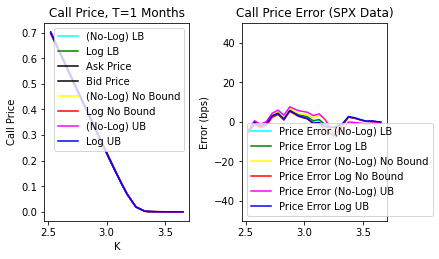

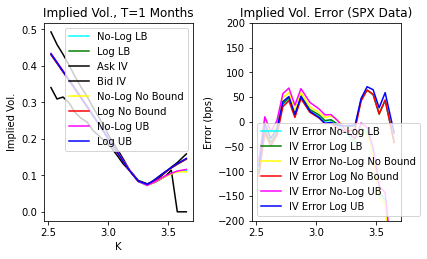

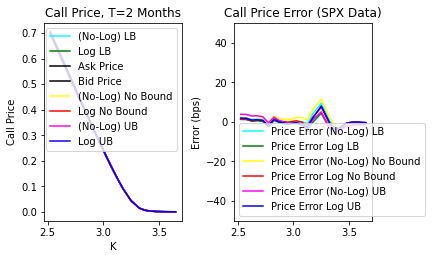

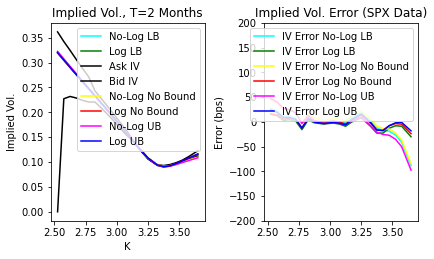

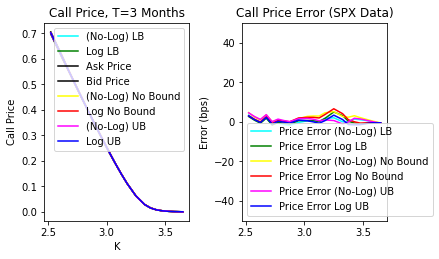

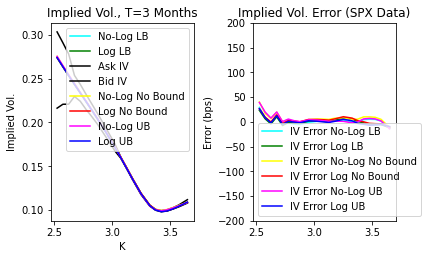

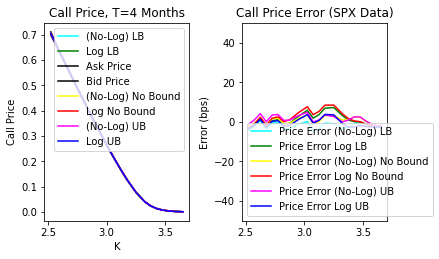

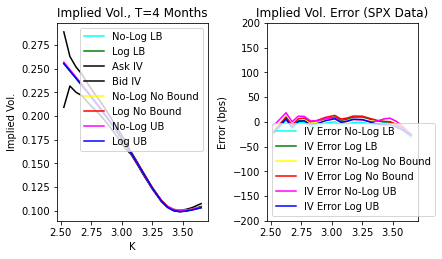

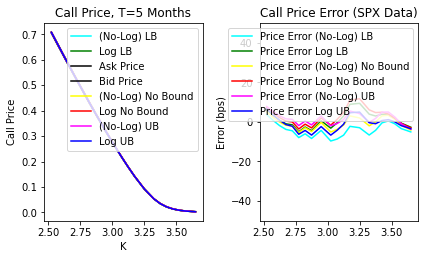

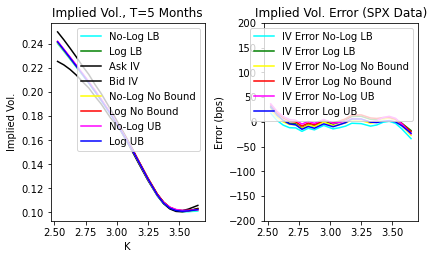

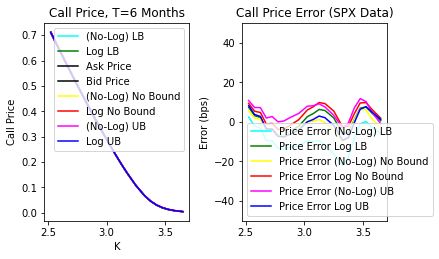

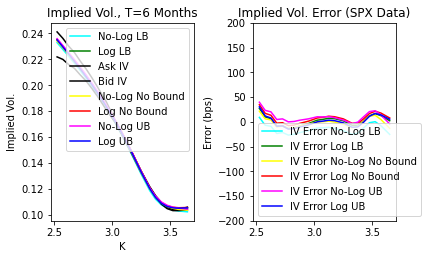

In [6]:
#for filename in files:
get_vanilla_iv(files)
